In [ ]:
import pandas as pd
import zipfile


zip_path = r'C:\Users\Harish Kummara\OneDrive\Desktop\Data science Lab Project\archive (30).zip'


with zipfile.ZipFile(zip_path) as z:
    with z.open('Loan_default.csv') as f:
        df = pd.read_csv(f)


df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


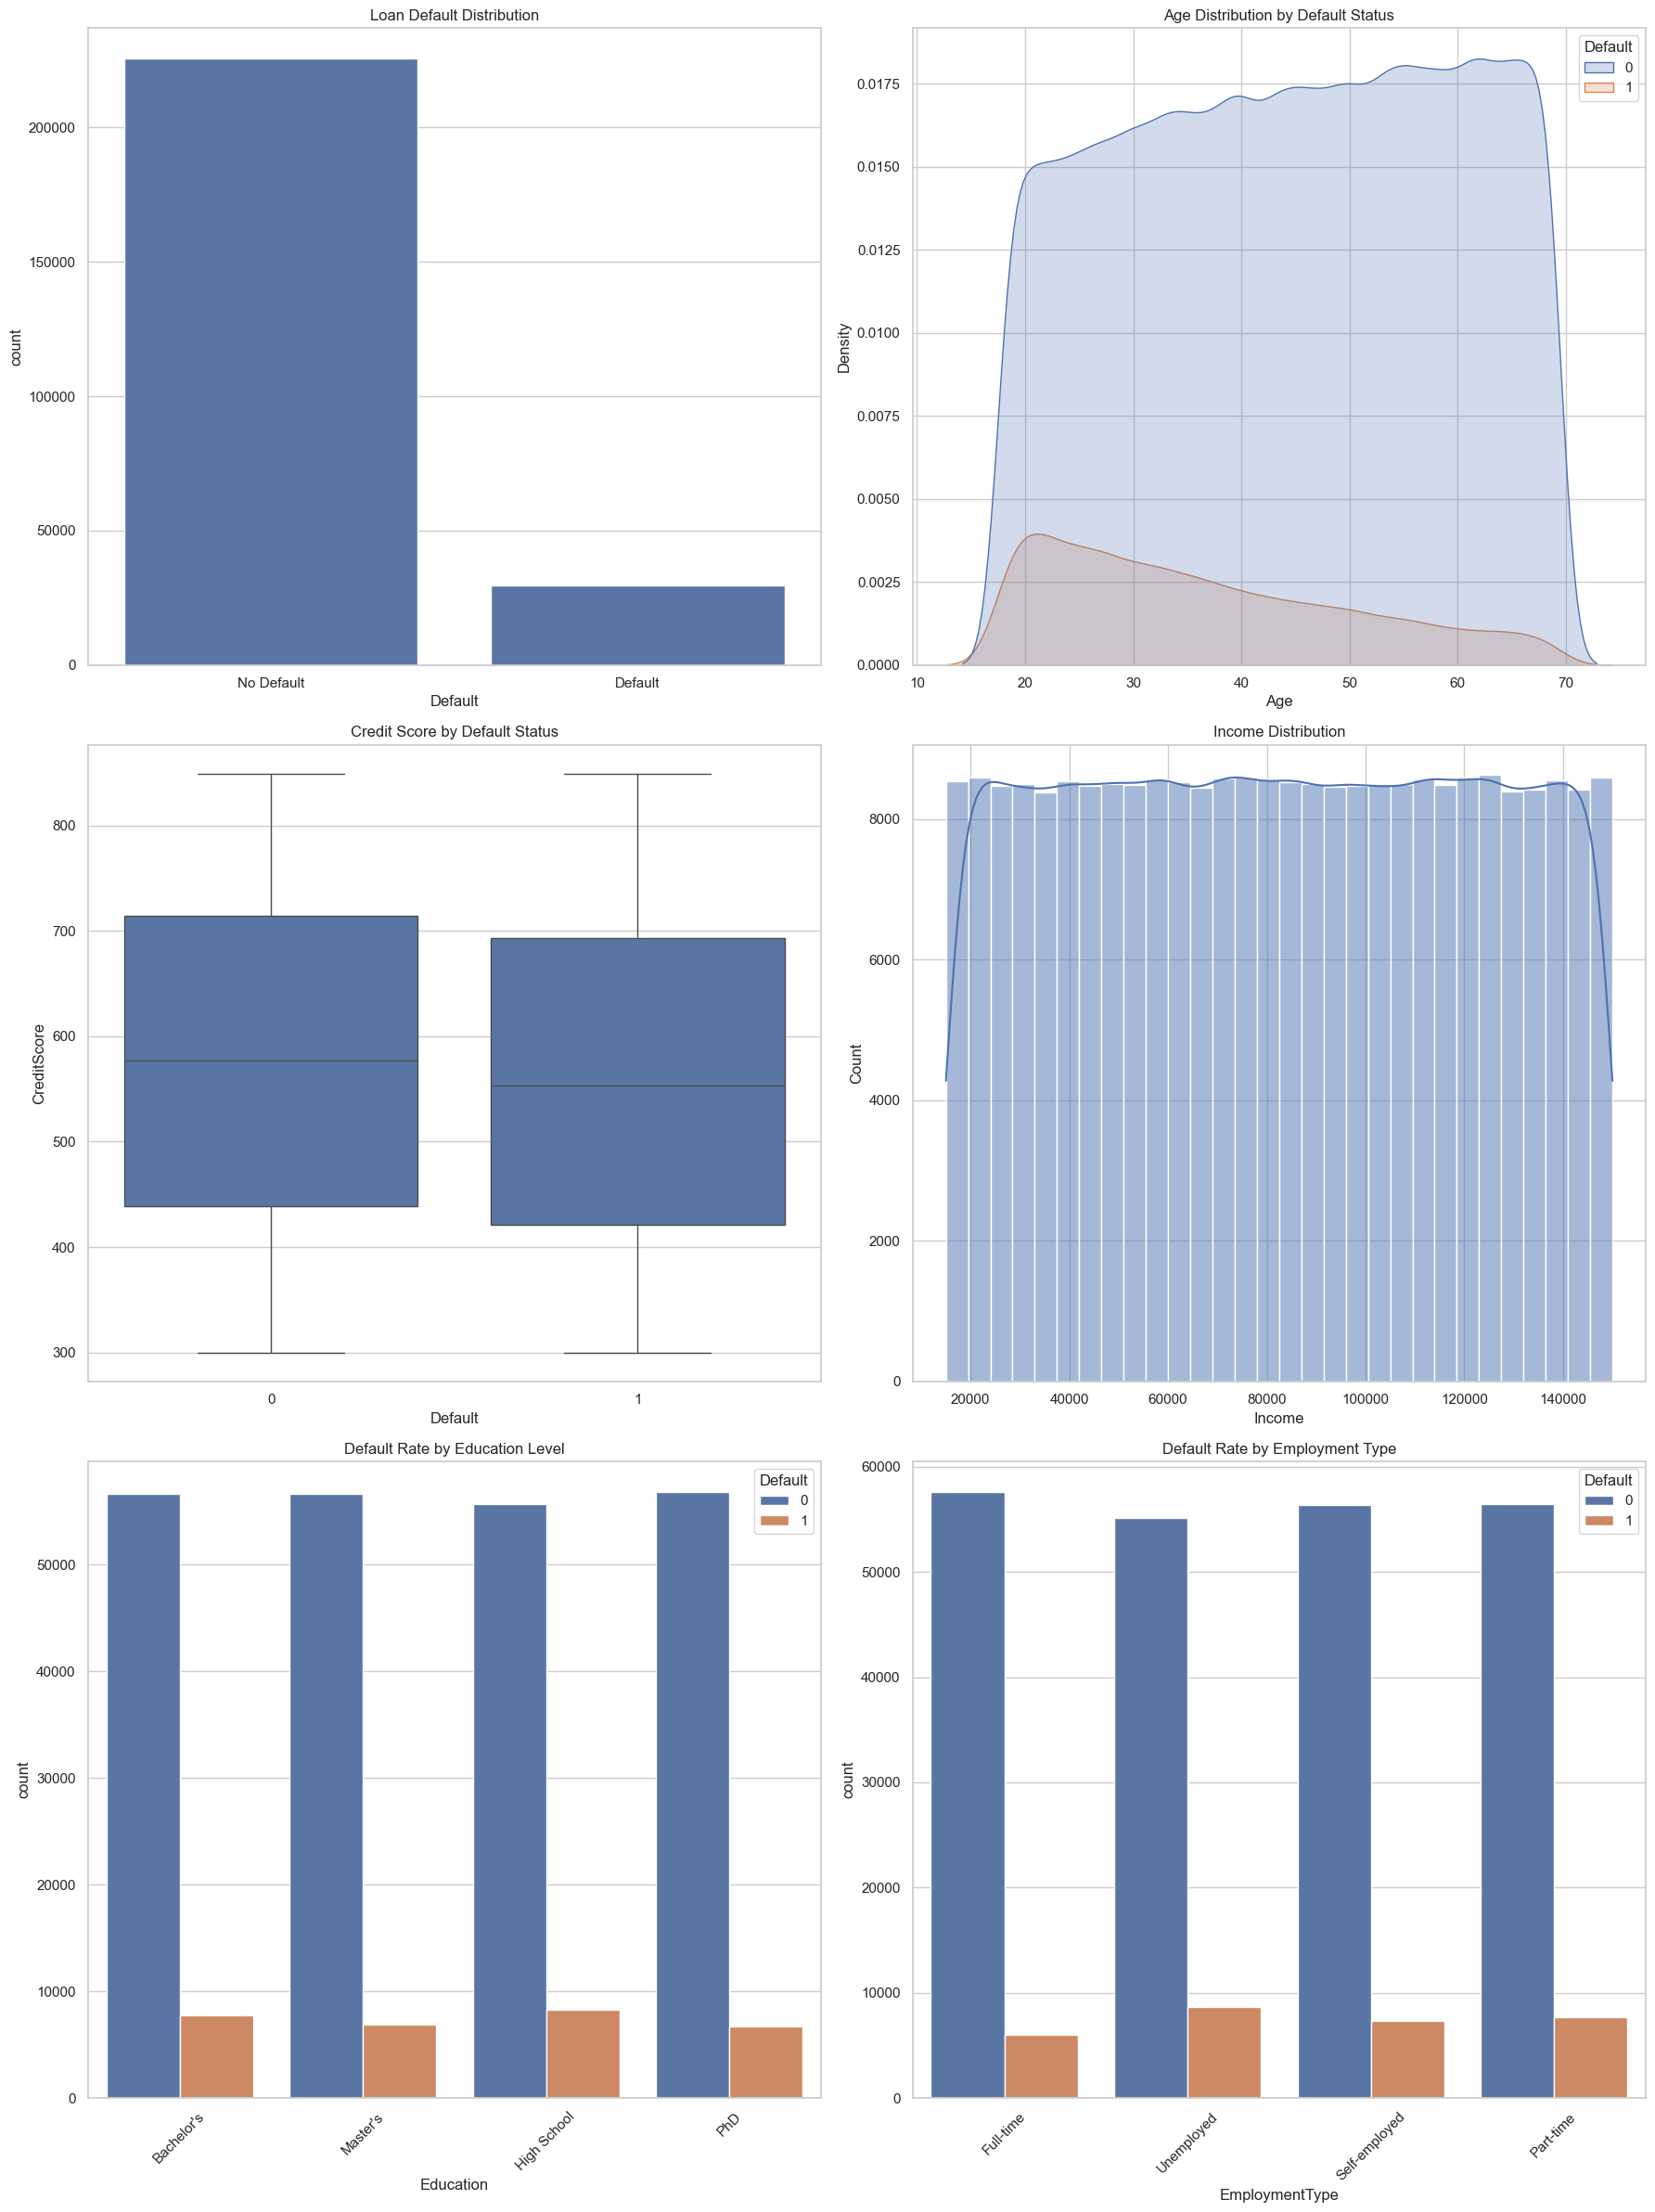

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


zip_path = r'C:\Users\Harish Kummara\OneDrive\Desktop\Data science Lab Project\archive (30).zip'


with zipfile.ZipFile(zip_path) as z:
    with z.open('Loan_default.csv') as f:
        df = pd.read_csv(f)


df.drop(columns=['LoanID'], inplace=True)


df['Default'] = df['Default'].astype(int)


sns.set(style="whitegrid")


plt.figure(figsize=(18, 24))


plt.subplot(3, 2, 1)
sns.countplot(data=df, x='Default')
plt.title('Loan Default Distribution')
plt.xticks([0, 1], ['No Default', 'Default'])


plt.subplot(3, 2, 2)
sns.kdeplot(data=df, x='Age', hue='Default', fill=True)
plt.title('Age Distribution by Default Status')


plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='Default', y='CreditScore')
plt.title('Credit Score by Default Status')


plt.subplot(3, 2, 4)
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Income Distribution')


plt.subplot(3, 2, 5)
sns.countplot(data=df, x='Education', hue='Default')
plt.title('Default Rate by Education Level')
plt.xticks(rotation=45)


plt.subplot(3, 2, 6)
sns.countplot(data=df, x='EmploymentType', hue='Default')
plt.title('Default Rate by Employment Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


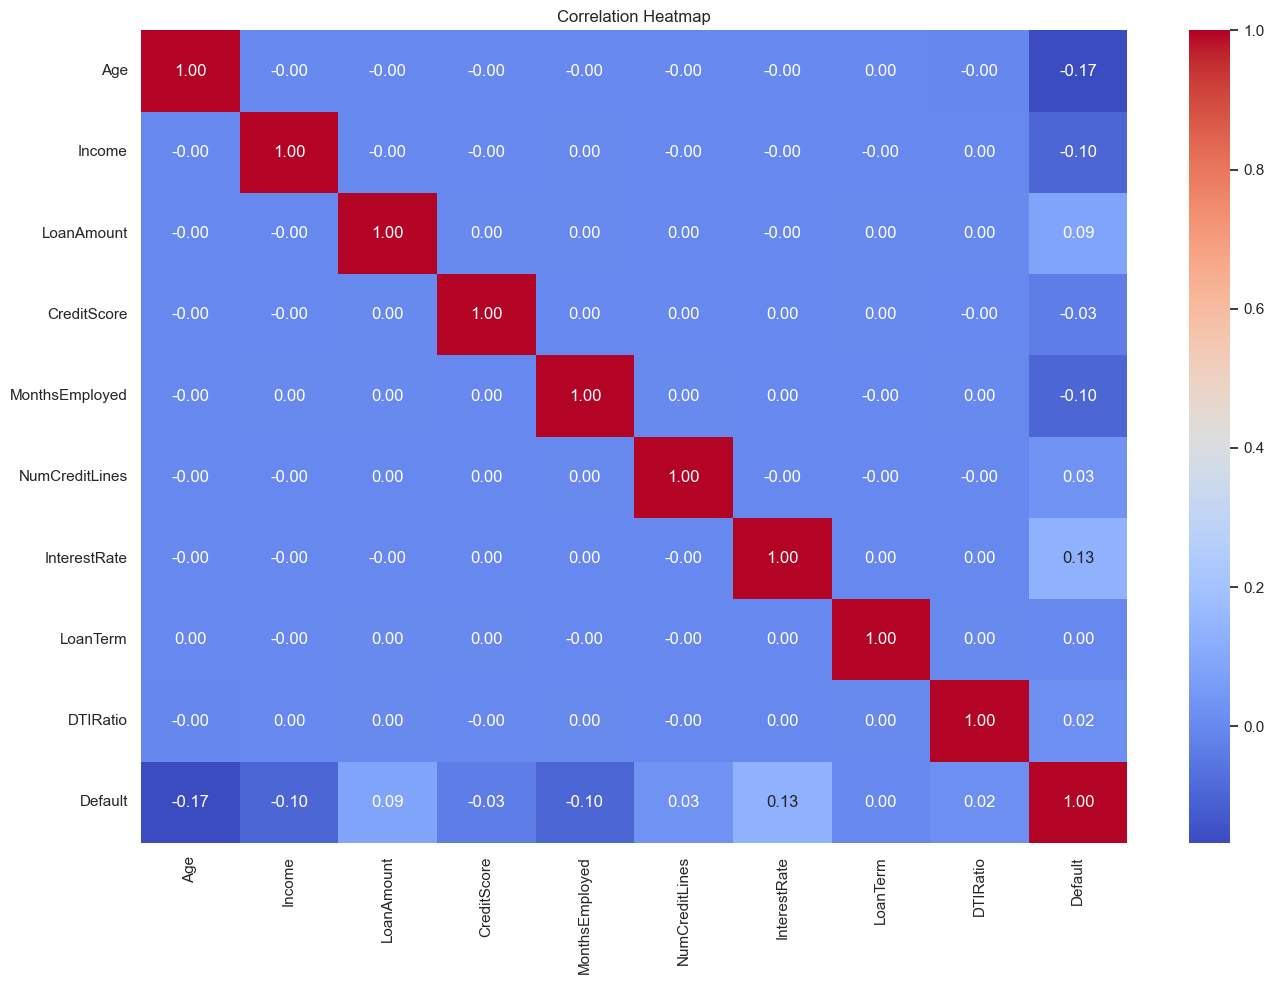

Class Distribution (%):
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64


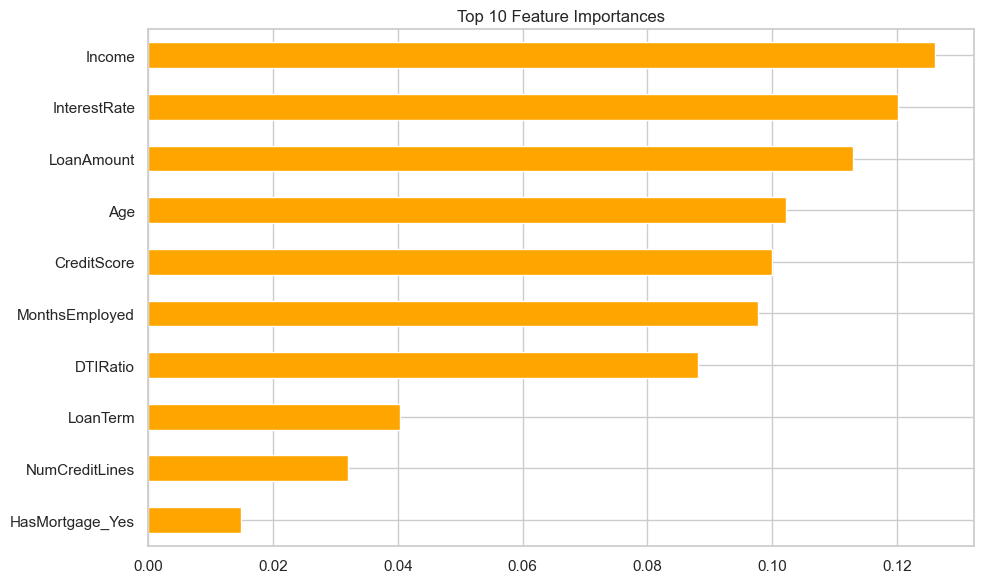


Top 10 Predictive Features:
Income             0.126087
InterestRate       0.120195
LoanAmount         0.113021
Age                0.102290
CreditScore        0.100056
MonthsEmployed     0.097823
DTIRatio           0.088182
LoanTerm           0.040419
NumCreditLines     0.031977
HasMortgage_Yes    0.014890
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


zip_path = r'C:\Users\Harish Kummara\OneDrive\Desktop\Data science Lab Project\archive (30).zip'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('Loan_default.csv') as f:
        df = pd.read_csv(f)


df.drop(columns=["LoanID"], inplace=True)
df['Default'] = df['Default'].astype(int)


plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


class_dist = df['Default'].value_counts(normalize=True)
print("Class Distribution (%):")
print(class_dist * 100)


df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("Default", axis=1)
y = df_encoded["Default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print("\nTop 10 Predictive Features:")
print(importances.head(10))


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.62      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



c:\Users\Harish Kummara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.59      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.74      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.64      0.05      0.09      5931

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


rf.fit(X_res, y_res)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report


y_pred_res = rf.predict(X_test)


print("=== Random Forest (after SMOTE) ===")
print(classification_report(y_test, y_pred_res))


=== Random Forest (after SMOTE) ===
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     45139
           1       0.34      0.09      0.15      5931

    accuracy                           0.87     51070
   macro avg       0.61      0.53      0.54     51070
weighted avg       0.83      0.87      0.84     51070



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import zipfile


zip_path = r'C:\Users\Harish Kummara\OneDrive\Desktop\Data science Lab Project\archive (30).zip'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('Loan_default.csv') as f:
        df = pd.read_csv(f)


df.drop(columns=["LoanID"], inplace=True)
df['Default'] = df['Default'].astype(int)
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("Default", axis=1)
y = df_encoded["Default"]


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)


y_pred_res = rf.predict(X_test)
print("=== Random Forest (after SMOTE) ===")
print(classification_report(y_test, y_pred_res))


=== Random Forest (after SMOTE) ===
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     45139
           1       0.34      0.09      0.15      5931

    accuracy                           0.87     51070
   macro avg       0.61      0.53      0.54     51070
weighted avg       0.83      0.87      0.84     51070



In [ ]:
import joblib


joblib.dump(rf, "loan_default_model.pkl")


['loan_default_model.pkl']

In [6]:
print(X_train.columns.tolist())


['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education_High School', "Education_Master's", 'Education_PhD', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_Yes', 'HasDependents_Yes', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'HasCoSigner_Yes']


In [ ]:
import zipfile
import os


zip_path = r"C:\Users\Harish Kummara\OneDrive\Desktop\Data science Lab Project\archive (30).zip"
extract_to = r"C:\Users\Harish Kummara\OneDrive\Desktop\Data science Lab Project\unzipped"


os.makedirs(extract_to, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    extracted_files = zip_ref.namelist()


print("✅ Extracted files:")
for file in extracted_files:
    print(f" - {file}")


✅ Extracted files:
 - Loan_default.csv


In [ ]:
import pandas as pd
import joblib


csv_path = r"C:\Users\Harish Kummara\OneDrive\Desktop\Data science Lab Project\unzipped\Loan_default.csv"
df = pd.read_csv(csv_path)


expected_columns = df.drop(columns=["Default"]).columns.tolist()


joblib.dump(expected_columns, "expected_columns.pkl")

print("✅ expected_columns.pkl created successfully with:")
print(expected_columns)


✅ expected_columns.pkl created successfully with:
['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


In [ ]:
import pandas as pd
import joblib


csv_path = r"C:\Users\Harish Kummara\OneDrive\Desktop\Data science Lab Project\unzipped\Loan_default.csv"


df = pd.read_csv(csv_path)


X = df.drop(columns=["Default"])


categorical_columns = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
]


X_encoded = pd.get_dummies(X, columns=categorical_columns)


expected_columns = X_encoded.columns.tolist()
joblib.dump(expected_columns, "expected_columns.pkl")

print("✅ expected_columns.pkl created successfully.")


✅ expected_columns.pkl created successfully.


In [ ]:
import pandas as pd
import joblib
import streamlit as st  


input_data = {
    'Age': 30,
    'Income': 50000,
    'LoanAmount': 10000,
    'CreditScore': 600,
    'MonthsEmployed': 24,
    'NumCreditLines': 3,
    'InterestRate': 10.0,
    'LoanTerm': 36,
    'DTIRatio': 0.3,
    'Education_High School': 0,
    "Education_Master's": 1,
    'Education_PhD': 0,
    'EmploymentType_Part-time': 0,
    'EmploymentType_Self-employed': 0,
    'EmploymentType_Unemployed': 0,
    'MaritalStatus_Married': 1,
    'MaritalStatus_Single': 0,
    'HasMortgage_Yes': 1,
    'HasDependents_Yes': 1,
    'LoanPurpose_Business': 0,
    'LoanPurpose_Education': 0,
    'LoanPurpose_Home': 1,
    'LoanPurpose_Other': 0,
    'HasCoSigner_Yes': 1
}


input_df = pd.DataFrame([input_data])


input_encoded = pd.get_dummies(input_df)


expected_columns = joblib.load("expected_columns.pkl")


missing_cols = [col for col in expected_columns if col not in input_encoded.columns]
extra_cols = [col for col in input_encoded.columns if col not in expected_columns]


print("✅ Expected columns from training:")
print(expected_columns)

print("\n📥 Input columns:")
print(input_encoded.columns.tolist())

print("\n⚠️ Missing columns:", missing_cols if missing_cols else "None")
print("🚫 Extra columns:", extra_cols if extra_cols else "None")


✅ Expected columns from training:
['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', "Education_Bachelor's", 'Education_High School', "Education_Master's", 'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes', 'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes']

📥 Input columns:
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education_High School', "Education_Master's", 'Education_PhD', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Married', 'MaritalS